# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

# Data Problem Definition: LRRR
Identify the key predictive factors that influence the sale price of used cars using a dataset of 426,000 vehicle records. Specifically, develop a regression model that explains the variation in sale price based on various attributes such as make, model, year, mileage, condition, and other relevant features. The goal is to extract insights on the relationships between these attributes and sale price, ultimately informing feature importance and driving business recommendations for the used car dealership.<br/>
Key Objectives:<br/>
<ul>
    <li>
Identify significant predictors of used car sale price.
    </li>
    <li>
Quantify the relationships between predictors and sale price.
    </li>
    <li>
Rank features by importance to inform business decisions.
    </li>
</ul>
Technical Requirements:<br/>
<ul>
    <li>
Data preprocessing and feature engineering
    </li>
    <li>
Regression modeling (e.g., linear, generalized linear, or tree-based)
    </li>
    <li>
Feature selection and importance analysis
    </li>
    <li>
Model evaluation and validation
    </li>
</ul> <br/>
This reframed definition provides a clear direction for the data analysis task, focusing on identifying key drivers of used car prices using regression modeling and feature importance analysis.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

# Data Understanding Steps LRRR
I will use the following steps to get familiar with the dataset and identify quality issues: <br/>
<ul>
<li>
Step 1: Initial Data Review
<ul>
    <li>
Check the dataset's dimensions (number of rows, columns)
    </li>
    <li>
Review the data types for each column (numeric, categorical, date, etc.)
    </li>
</ul>
</li>    
<li>
Step 2: Summary Statistics
<ul>
    <li>
Calculate summary statistics for numeric columns (mean, median, mode, min, max, std dev)
    </li>
    <li>
Generate frequency distributions for categorical columns
    </li>
</ul>    
</li>
<li>
Step 3: Data Visualization
    <ul>
        <li>
Plot histograms or density plots for numeric columns
        </li>
        <li>
Create bar charts or pie charts for categorical columns
        </li>
        <li>
Use scatter plots or correlation matrices to explore relationships between columns
        </li>
    </ul>
</li>
    <li>
Step 4: Missing Value Analysis
        <ul>
            <li>
Identify columns with missing values
            </li>
            <li>
Calculate the percentage of missing values for each column
            </li>
            <li>
Determine the pattern of missing values (random, systematic)
            </li>
        </ul>
    </li>
    <li>
Step 5: Data Quality Checks
        <ul>
            <li>
Check for invalid or inconsistent values
            </li>
            <li>
Identify duplicates or redundant records
            </li>
            <li>
Verify data formats (e.g., date, time, categorical)
            </li>
        </ul>
    </li>
    <li>
Step 6: Correlation Analysis
<ul>
    <li>
Calculate pairwise correlations between numeric columns
    </li>
    <li>
Identify highly correlated columns
    </li>
</ul>
    </li>
    <li>
Step 7: Data Profiling
        <ul>
            <li>
Create a data profile report summarizing the findings
            </li>
    <li>
Document data quality issues, inconsistencies, and areas for improvement        <ul>
    </li>
        </ul>
    </li>
</ul>


In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [52]:
df = pd.read_csv('data/vehicles.csv')


In [53]:
info = df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [55]:
df.describe(include="all")

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,4.268800e+05,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426880
unique,NaN,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,50614
mean,7.311487e+09,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.473170e+06,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.207408e+09,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.308143e+09,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.312621e+09,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.315254e+09,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
isn = df.isnull().sum()
percent = (df.isnull().sum() / len(df)) * 100
info = pd.DataFrame(isn)
info["percent"] = percent
#info.to_html()


In [44]:
percent = (df["drive"].isnull().sum() / len(df)) * 100
print(percent)
print(len(df))
print(df["drive"].isnull().sum())
#130567 /296313


30.586347451274364
426880
130567


0.44063878398855266

In [57]:
#Find the null values
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

### Create plot to have a visual representation of the raw data

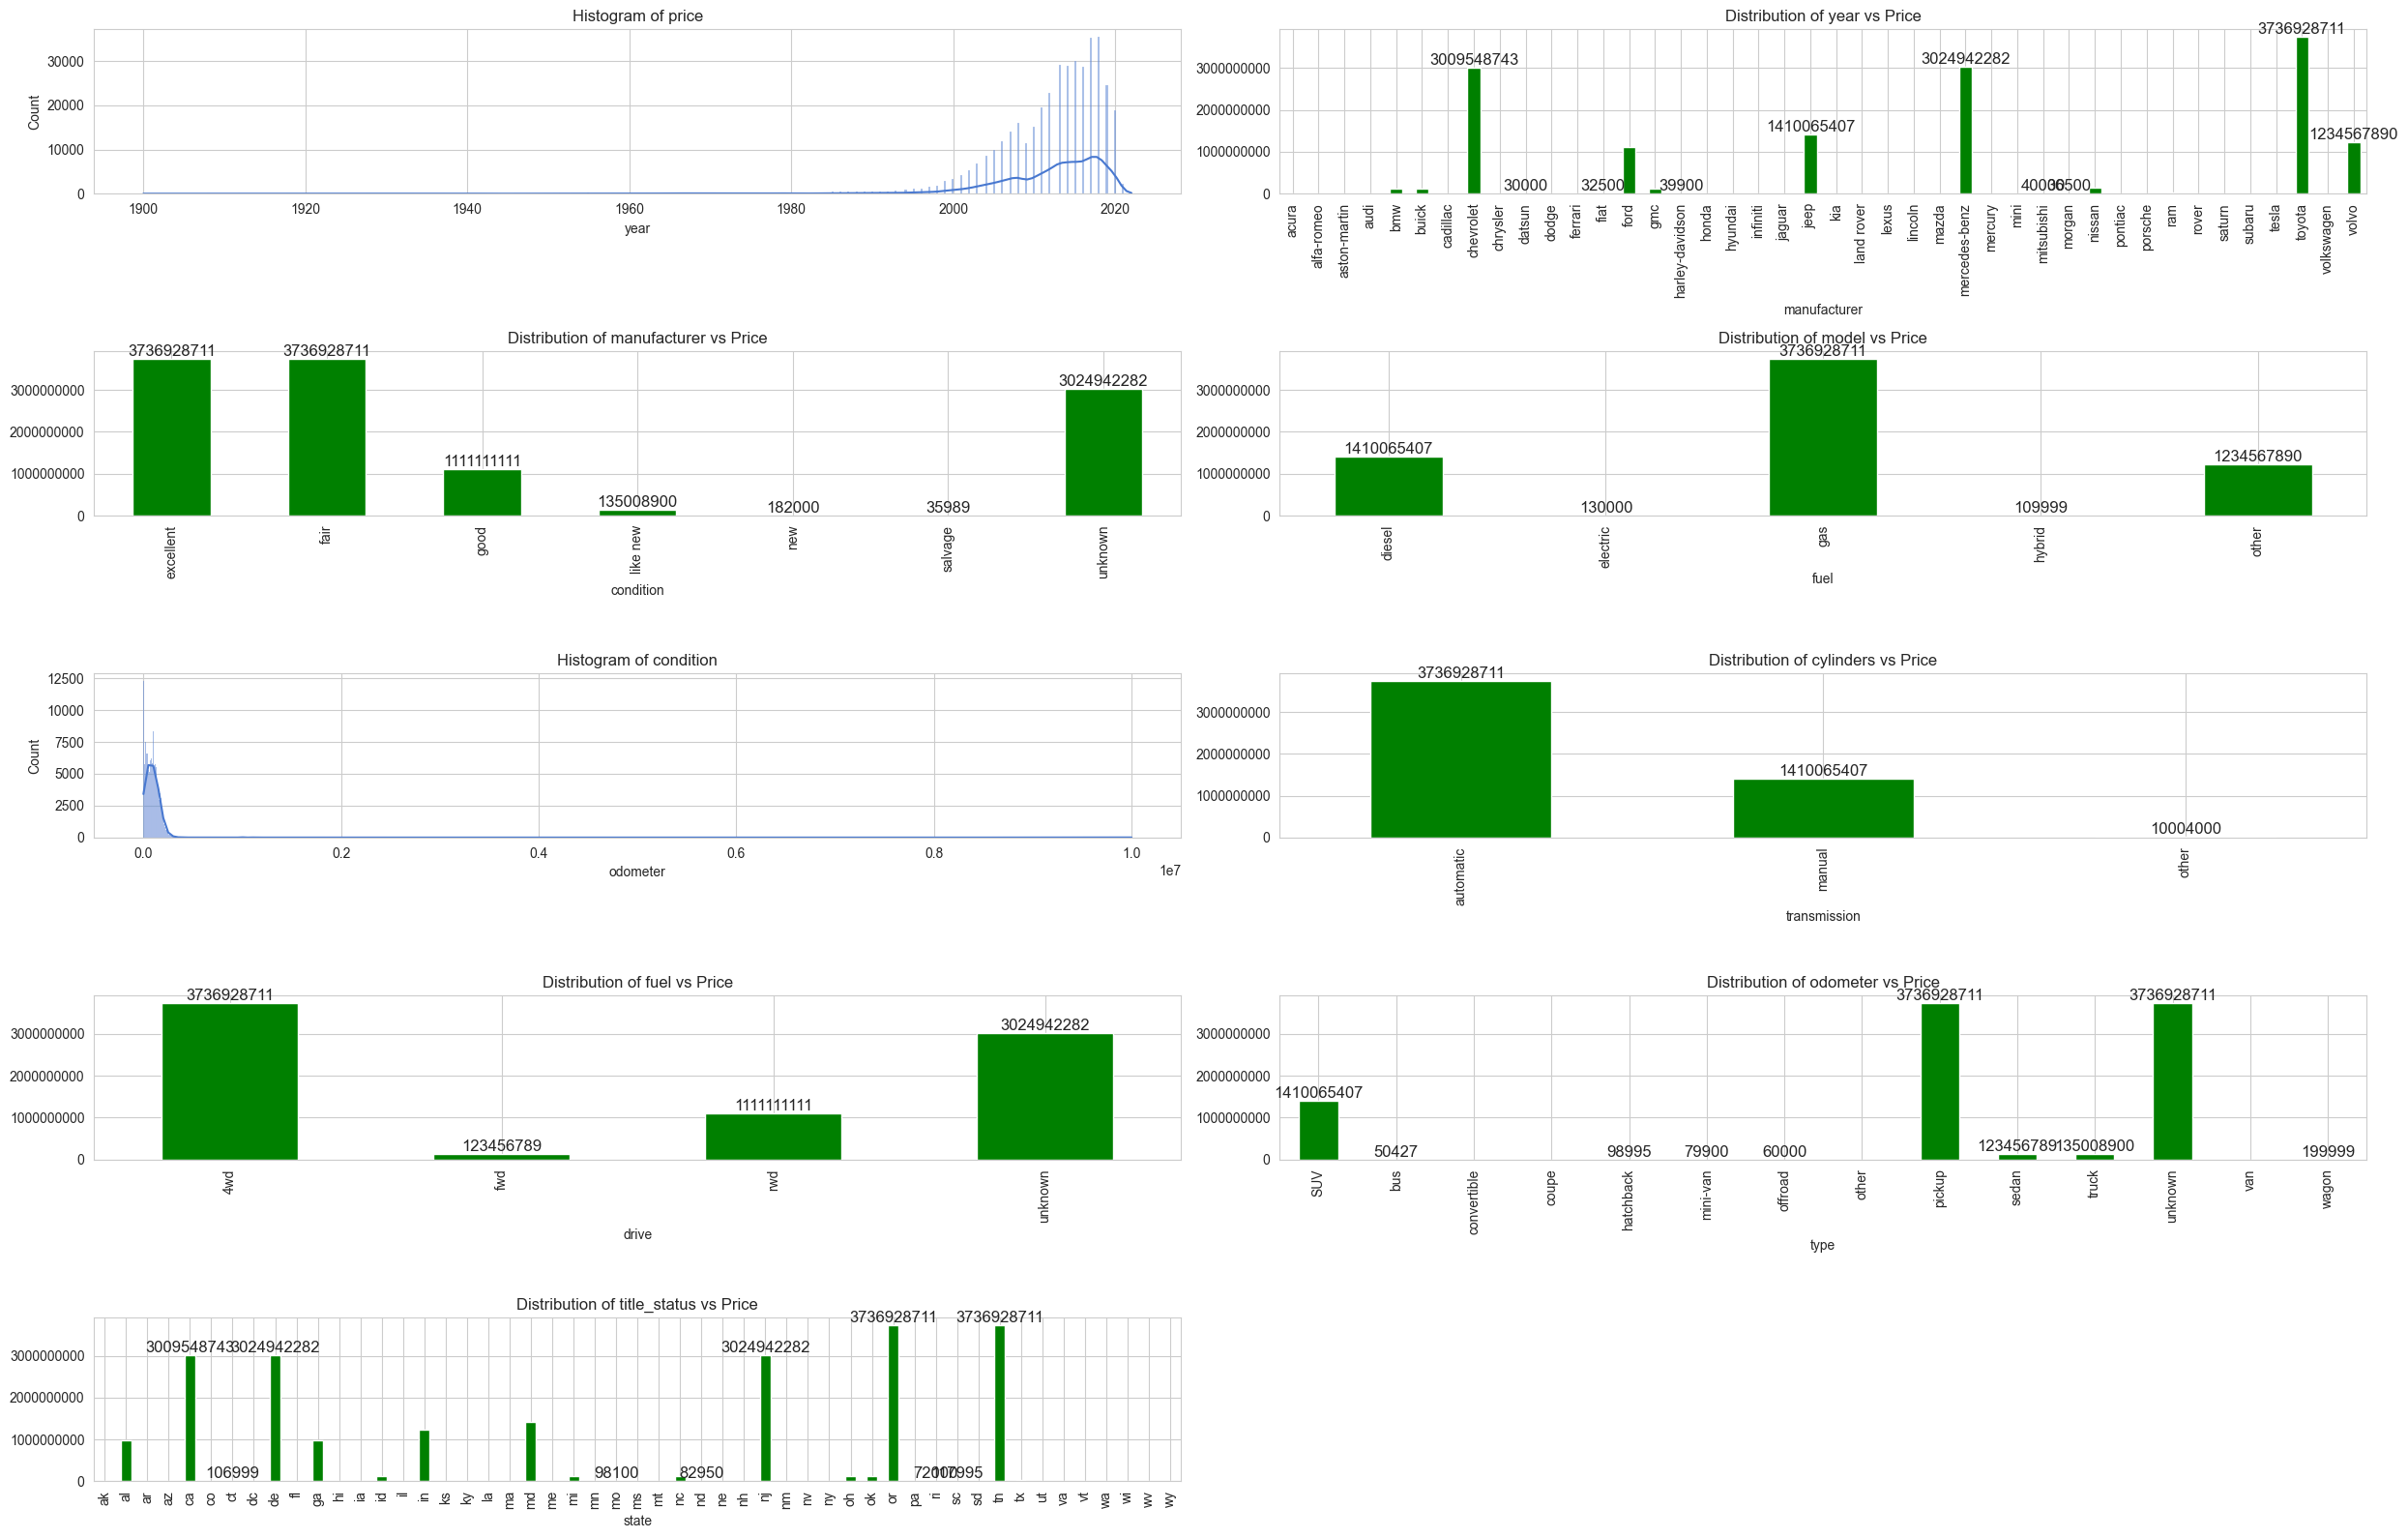

In [132]:
#numerical_features = df.select_dtypes(include = ['int64', 'float64']).columns
df = pd.read_csv('data/vehicles.csv')


df = df.drop(['id', 'VIN','size',"region"], axis=1)

df.dropna(subset=['odometer','transmission','manufacturer'], inplace=True)


q_low = df["price"].quantile(0.1)
q_hi  = df["price"].quantile(.95)

#df = df[(df["price"] < q_hi) & (df["price"] > q_low)]

df = df[df['year'].notna()]
df = df[df['manufacturer'].notna()]
df.fillna({"fuel": "gas"}, inplace=True)
df.fillna({'title_status':'missing'}, inplace=True)
df.fillna({'drive':'unknown'}, inplace=True)
df.fillna({'paint_color':'unknown'}, inplace=True)
df.fillna({'condition':'unknown'}, inplace=True)
df.fillna({'type':'unknown'}, inplace=True)

numerical_features = df.select_dtypes(include=['int32','int64','float64', "object"]).columns
numeric = df[numerical_features]

state = [item for item in numerical_features if item != "model" and item != "title_status" and item != 'cylinders' and item != 'cylinders' and item != 'price'
         and not item.startswith("state_") and not item.startswith("manufacturer_") and not item.startswith("title_") and not item.startswith("paint_")  and not item.startswith("type_")]


row = int((len(state)/2))

if(row % 2 != 0):
    row += 1

plt.figure(figsize=(25, row * 4))

# for loop to plot the histogram
for i in range(len(state)):
    
    plt.subplot(row+1 , 2 , i+1)

    # plot the histogram
    if (numeric[f'{state[i]}'].dtype == "object"):
        plt.ticklabel_format(axis='y', style='plain')
#        numeric.groupby(f'{state[i]}')['price'].max().plot(kind = 'bar', color = 'g')
        max_price = numeric.groupby(f'{state[i]}')['price'].max()

        ax = max_price.plot(kind='bar', color='g')
        
        # Add value labels
        top_5 = max_price.nlargest(5)
        bottom_5 = max_price.nsmallest(5)
        for p in ax.patches:
            if p.get_height() in top_5.values or p.get_height() in bottom_5.values:
                ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(p.get_height()), 
                        fontsize=12, ha='center', va='bottom')
        plt.title(f'Distribution of {numeric.columns[i]} vs Price')
    
    else:
        sns.set_style('whitegrid')
        sns.set_palette('muted')
        sns.histplot(data= numeric, x = state[i], kde=True, fill=True, alpha=0.5)
        plt.title(f'Histogram of {numeric.columns[i]}')
        
    plt.tight_layout()
#    break

#plt.savefig('images/histo_cleansed.png')
plt.savefig('images/histo.png')
plt.show()


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Create a visual representation of the cleansed and processed data

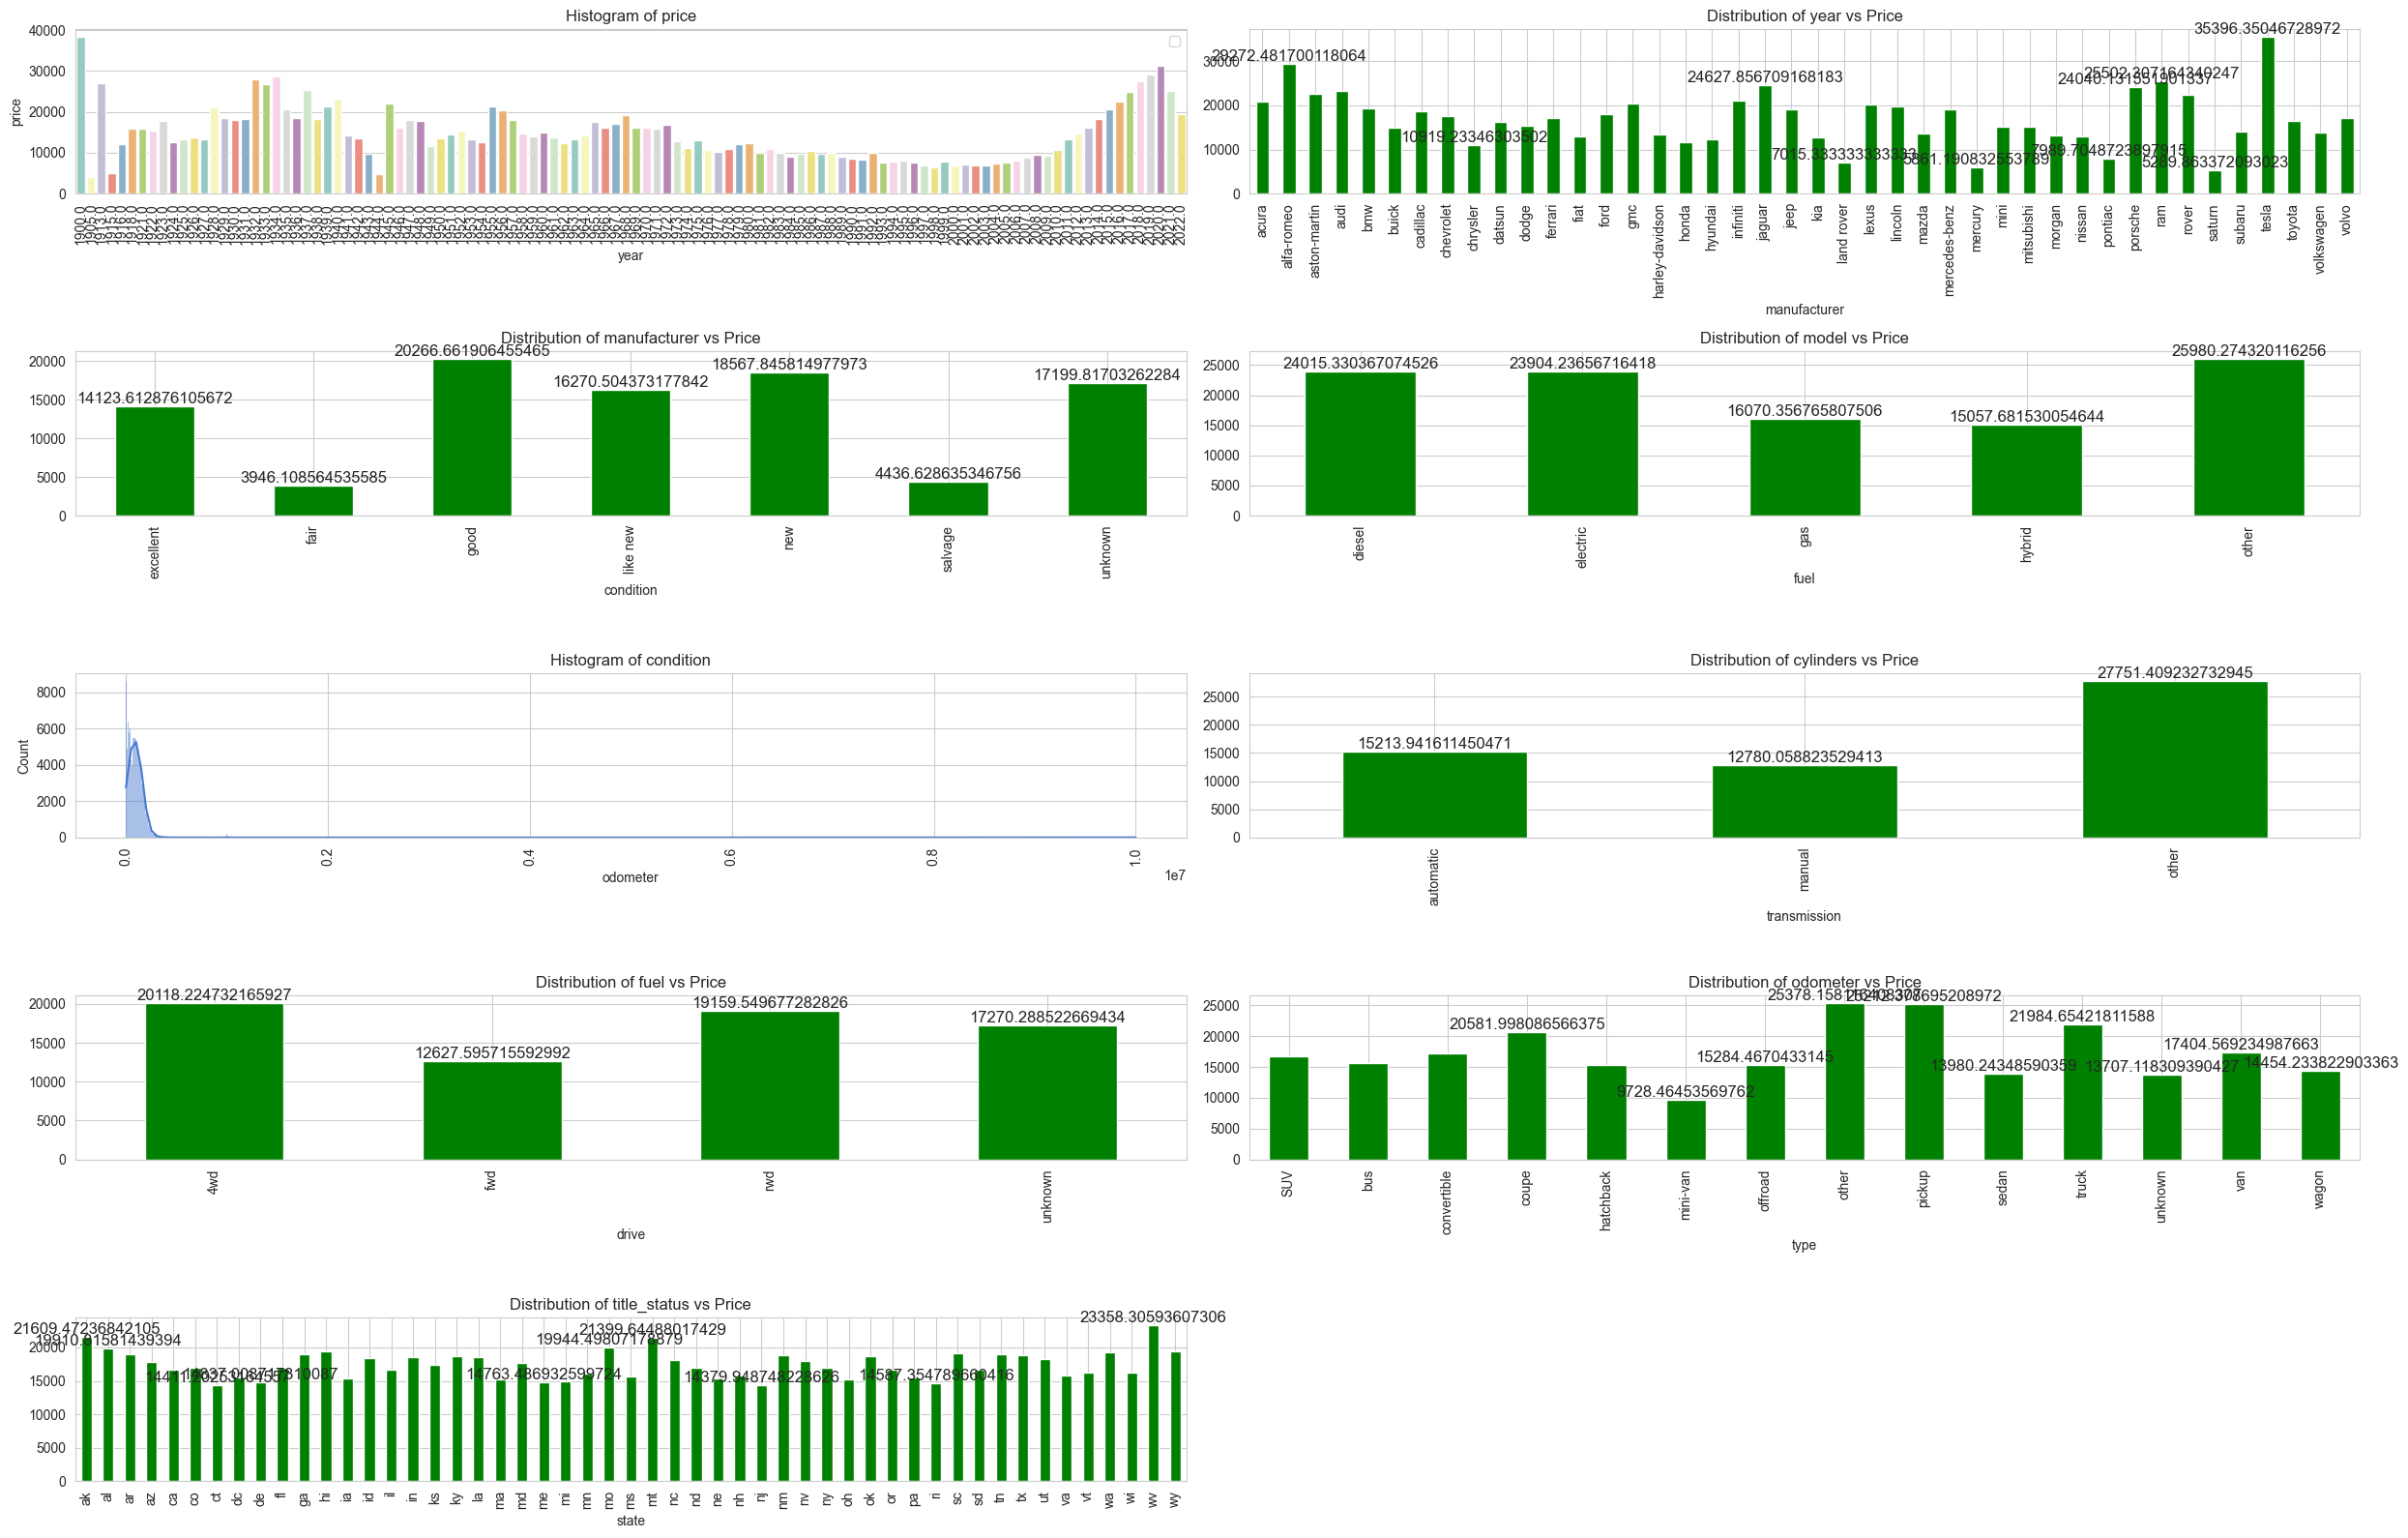

In [131]:
#numerical_features = df.select_dtypes(include = ['int64', 'float64']).columns
df = pd.read_csv('data/vehicles.csv')


df = df.drop(['id', 'VIN','size',"region"], axis=1)

df.dropna(subset=['odometer','transmission','manufacturer'], inplace=True)


q_low = df["price"].quantile(0.1)
q_hi  = df["price"].quantile(.95)

df = df[(df["price"] < q_hi) & (df["price"] > q_low)]

df = df[df['year'].notna()]
df = df[df['manufacturer'].notna()]
df.fillna({"fuel": "gas"}, inplace=True)
df.fillna({'title_status':'missing'}, inplace=True)
df.fillna({'drive':'unknown'}, inplace=True)
df.fillna({'paint_color':'unknown'}, inplace=True)
df.fillna({'condition':'unknown'}, inplace=True)
df.fillna({'type':'unknown'}, inplace=True)

numerical_features = df.select_dtypes(include=['int32','int64','float64', "object"]).columns
numeric = df[numerical_features]

state = [item for item in numerical_features if item != "model" and item != "title_status" and item != 'cylinders' and item != 'cylinders' and item != 'price'
         and not item.startswith("state_") and not item.startswith("manufacturer_") and not item.startswith("title_") and not item.startswith("paint_")  and not item.startswith("type_")]


row = int((len(state)/2))

if(row % 2 != 0):
    row += 1

plt.figure(figsize=(25, row * 4))

# for loop to plot the histogram
for i in range(len(state)):
    
    plt.subplot(row+1 , 2 , i+1)

    # plot the histogram
    if (numeric[f'{state[i]}'].dtype == "object"):
        plt.ticklabel_format(axis='y', style='plain')
#        numeric.groupby(f'{state[i]}')['price'].max().plot(kind = 'bar', color = 'g')
        max_price = numeric.groupby(f'{state[i]}')['price'].mean() #.max()

        ax = max_price.plot(kind='bar', color='g')
        
        # Add value labels
        top_5 = max_price.nlargest(5)
        bottom_5 = max_price.nsmallest(5)
        for p in ax.patches:
            if p.get_height() in top_5.values or p.get_height() in bottom_5.values:
                ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(p.get_height()), 
                        fontsize=12, ha='center', va='bottom')
        plt.title(f'Distribution of {numeric.columns[i]} vs Price')
    
    else:
        plt.xticks(rotation=90)
        sns.set_style('whitegrid')
        sns.set_palette('muted')
        if (state[i] == "year"):
            sns.barplot(legend=False, y='price', hue=state[i], x=state[i], data=df, estimator=np.mean, palette='Set3', errorbar=None)
            # Remove hue legend
            plt.legend([])
        else:
            sns.histplot(data= numeric, x = state[i], kde=True, fill=True, alpha=0.5)
        
        plt.title(f'Histogram of {numeric.columns[i]}')
        
    plt.tight_layout()
#    break

plt.savefig('images/histo_cleansed.png')
plt.show()


### Display and compare raw and processed price data

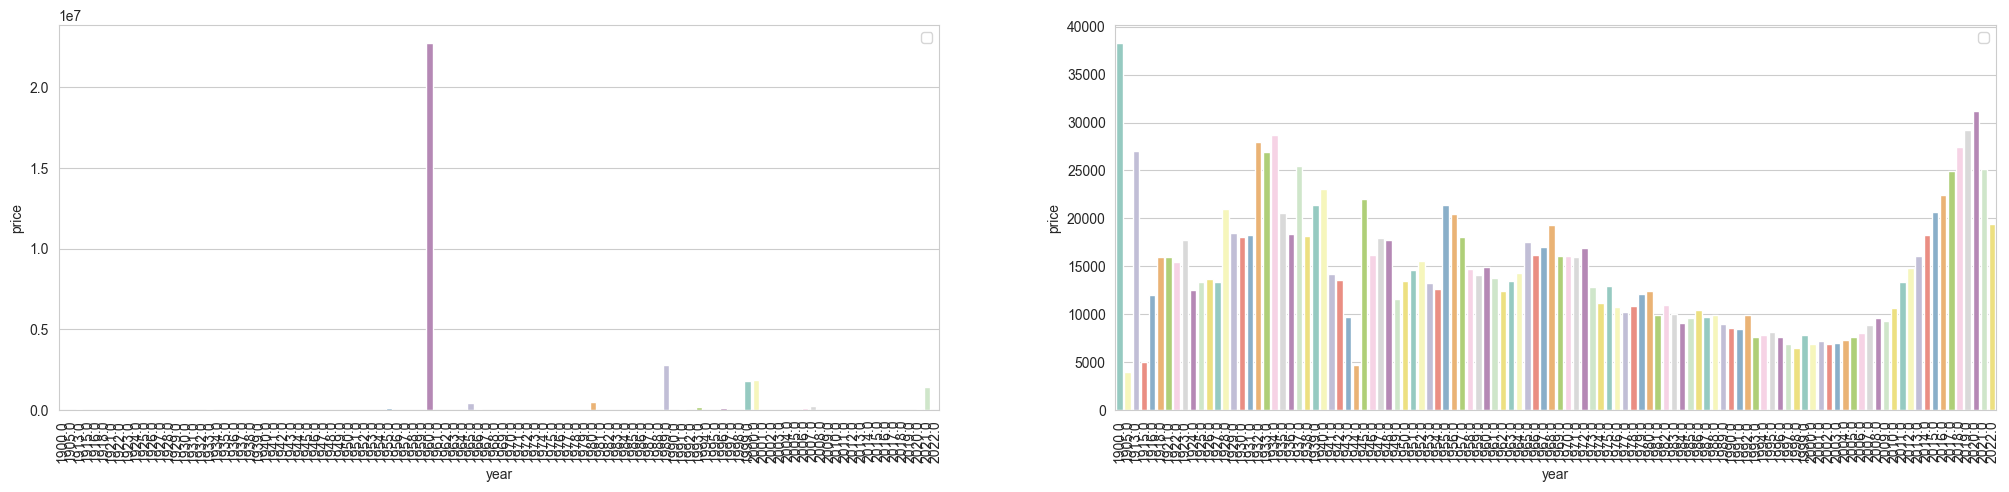

In [130]:
df = pd.read_csv('data/vehicles.csv')


df = df.drop(['id', 'VIN','size',"region"], axis=1)

df.dropna(subset=['odometer','transmission','manufacturer'], inplace=True)


q_low = df["price"].quantile(0.1)
q_hi  = df["price"].quantile(.95)

df_old = df.copy()

df = df[(df["price"] < q_hi) & (df["price"] > q_low)]
plt.figure(figsize=(25, 5))

def PrintPlot(df, x):
    plt.subplot(1 , 2 , x)
    plt.xticks(rotation=90)
    sns.set_style('whitegrid')
    sns.set_palette('muted')
    sns.barplot(legend=False, y='price', hue="year", x="year", data=df, estimator=np.mean, palette='Set3', errorbar=None)
                # Remove hue legend
    plt.legend([])
    

PrintPlot(df_old,1)
PrintPlot(df,2)

plt.savefig('images/pricevsyear.png')
plt.show()


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Create correlation matrix

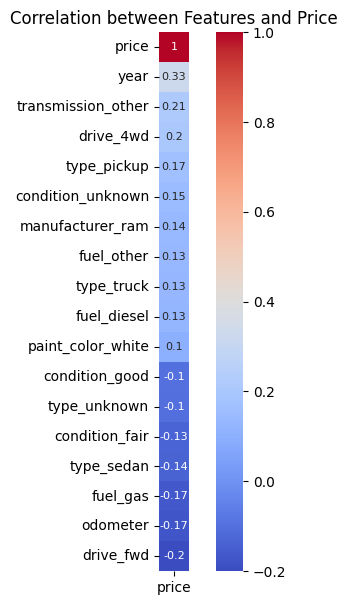

In [59]:
df_init = pd.read_csv('data/car_man_model2.csv')

df_init = df_init.drop(['Unnamed: 0'], axis=1)
numerical_features = df_init.select_dtypes(include=['int32','int64','float64']).columns

df = df_init[numerical_features]
corr_matrix = df.corr()
threshold = 0.1

# Mask correlation matrix
mask = np.abs(np.sort(corr_matrix)) < threshold 

plt.figure(figsize=(7, 7))

#We display only the values that are higher than .1 and below than .1 which are the most relevant for the correlation graph
c =corr_matrix.query("price < -0.1 or price > 0.1 ")[['price']].sort_values(by='price', ascending=False) #.plot(kind = 'barh', fontsize = 8, color = 'red')
corr_matrix[['price']].sort_values(by='price', ascending=False).to_csv("data/corr.csv")
#plt.figure(facecolor='#FFFFF0')

sns.heatmap(c,             
            cmap='coolwarm', annot=True, square=True,
            annot_kws={'fontsize': 8})
plt.title('Correlation between Features and Price')
plt.savefig('images/corr.png')
plt.show()


### Model
Prepare the model.
We will use the gridsearch model 

### Start Modelling

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.compose import make_column_transformer, TransformedTargetRegressor

df = pd.read_csv('data/car_man_model2.csv')

df = df.drop(['Unnamed: 0',"manufacturer","condition","cylinders","fuel","title_status","transmission","type","paint_color","state","drive","model"], axis=1)

#df.dropna(subset=['model'], inplace=True)

#df['model'] = df['model'].str.replace("'","").str.replace('"','').str.replace("&","").str.replace("$","").str.replace("♿","").str.replace("$","").str.replace("(","").str.replace("/","").str.replace("%","").replace("*","")

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int32','int64','float64']).columns



### GridSearch Model

In [21]:
preprocessor = make_column_transformer(
#    (OneHotEncoder(dtype='int'), categorical_columns),
    (StandardScaler(), numerical_columns),
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)

params_dict = {'alpha': [0.1, 1.0, 10.0]}
params_dict = {'alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}
ridge = Ridge()

grid = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GridSearchCV(ridge, param_grid=params_dict))
])


grid.fit(X_train, y_train)
train_preds = grid.predict(X_train)
test_preds = grid.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
### END SOLUTION

# Answer check
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
model_best_alpha = grid.named_steps["model"].best_params_ 
#model_best_alpha = grid.best_params_ 
print(f'Best alpha: {model_best_alpha}')
score = grid.score(X_test, y_test)
print(f'Score: {score}')


Train MSE: 56764345.04817702
Test MSE: 56792479.12011693
Best alpha: {'alpha': 1000.0}
Score: 0.38933649747908683


In [22]:
results = permutation_importance(grid, X_test, y_test, n_repeats=10, random_state=42)
#results

Permutation Importance (in order of importance):
year: 0.18666
transmission_other: 0.04106
odometer: 0.02784
condition_good: 0.02320
drive_fwd: 0.02182
condition_unknown: 0.01923
drive_4wd: 0.01678
condition_fair: 0.01585
type_pickup: 0.01440
type_sedan: 0.01227
type_truck: 0.01200
transmission_automatic: 0.01136
drive_rwd: 0.00689
fuel_diesel: 0.00682
manufacturer_nissan: 0.00659
condition_like new: 0.00562
type_other: 0.00501
state_ia: -0.00001
manufacturer_buick: -0.00002
state_ne: -0.00002
state_la: -0.00003
paint_color_purple: -0.00004
state_ga: -0.00004
state_ar: -0.00004


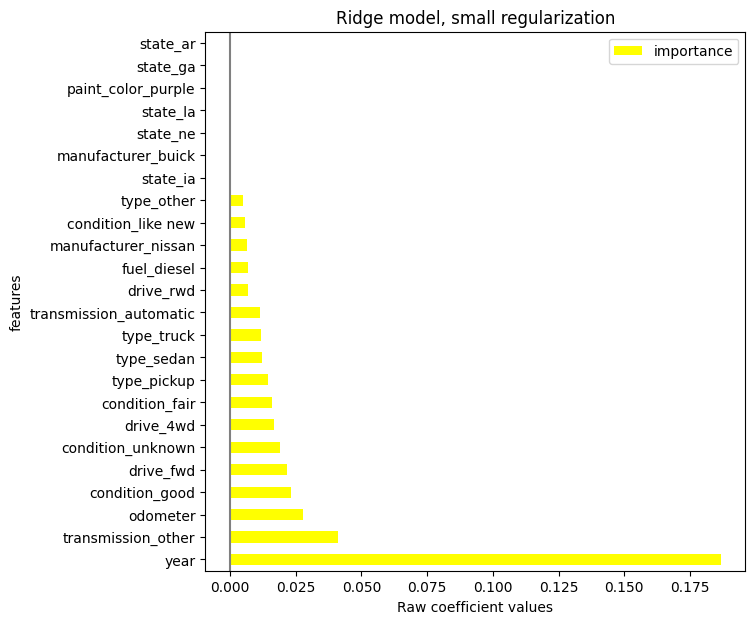

In [23]:
importance = results.importances_mean

grid_feature_names = grid[:-1].named_steps["preprocessor"].get_feature_names_out()
#grid_feature_names = grid.get_params
print('Permutation Importance (in order of importance):')

rows_list = []
for feature, importance in sorted(zip(grid_feature_names, importance), key=lambda x: x[1], reverse=True):
#    features[feature].append(importance)
    dict1 = {}
    if (f'{importance:.2f}' == "0.00"):
        continue
    rows_list.append([feature,importance]) 
    print(f'{feature}: {importance:.5f}')

df1 = pd.DataFrame(rows_list,columns=('features','importance')) 

df1.plot.barh(y="importance", x= "features", figsize=(9, 7), color="yellow")
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

Trained Mean Squared Error: 56792448.57428043
Test Squared Error: 56792448.57428043
Score: 0.38933682592446883
                            Coefficient
year                         287.246515
odometer                      -0.005683
manufacturer_acura          -985.989879
manufacturer_alfa-romeo     5904.328122
manufacturer_aston-martin  19166.947294
...                                 ...
condition_good             -1809.716652
condition_like new          2563.519249
condition_new               5523.766837
condition_salvage          -3569.047018
condition_unknown           2568.879039

[147 rows x 1 columns]


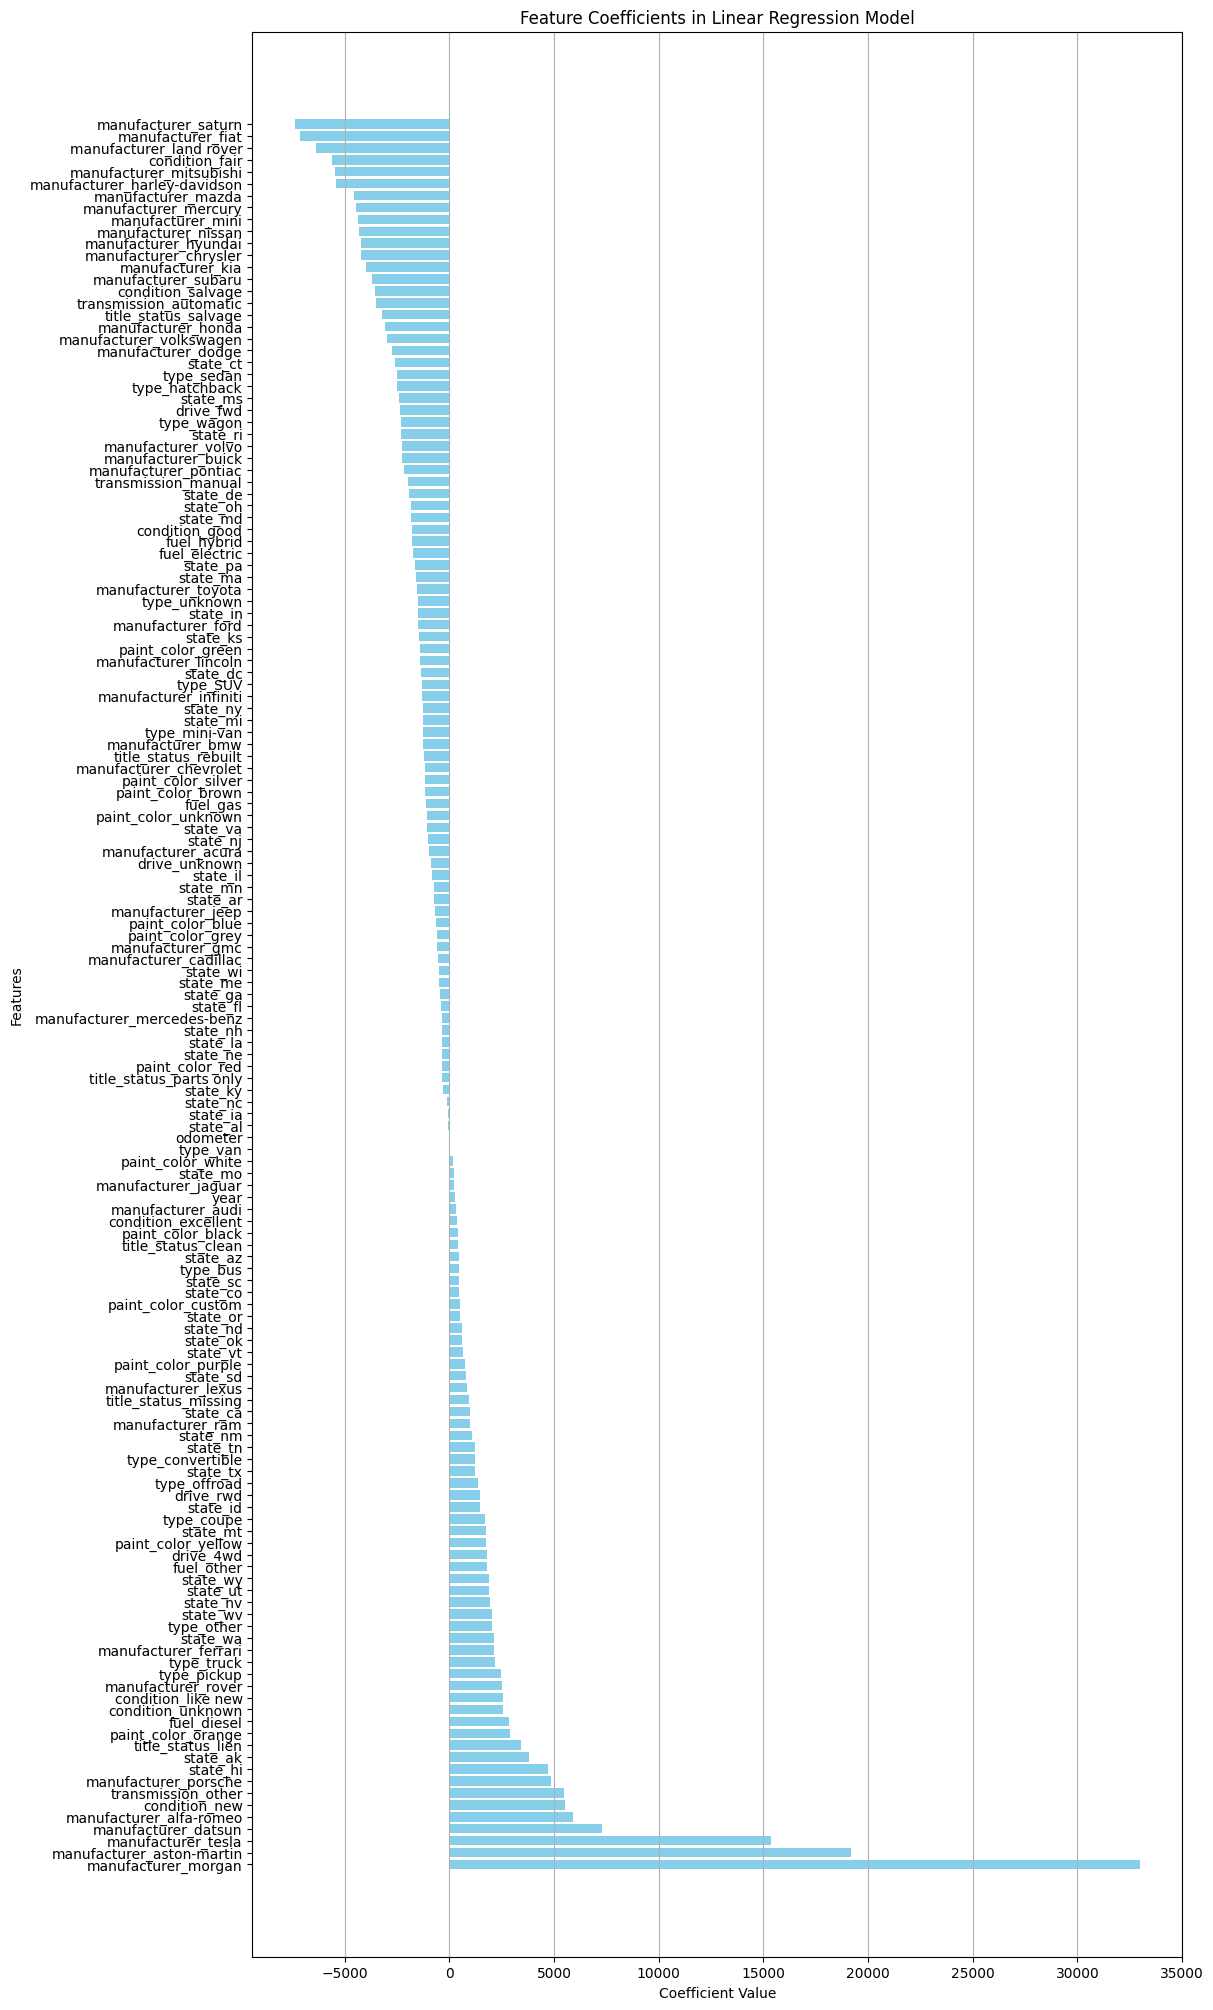

In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f'Trained Mean Squared Error: {mse}')
print(f'Test Squared Error: {mse}')

score = model.score(X_test, y_test)
print(f'Score: {score}')


coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
plt.figure(figsize=(12, 25))
plt.barh(coefficients.index, coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Coefficients in Linear Regression Model')
plt.grid(axis='x')
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Support Vector Regression': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor()
}

# Initialize a DataFrame to store the results
results = []

# Evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the results
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

In [34]:
results_df


,Model,MAE,MSE,R2
0,Linear Regression,5710.923347,5.679245e+07,0.389337
1,Ridge Regression,5711.025109,5.679241e+07,0.389337
2,Lasso Regression,5712.639606,5.680720e+07,0.389178
3,ElasticNet Regression,6669.618798,7.132609e+07,0.233063
4,Support Vector Regression,6329.353789,7.393032e+07,0.205061
5,Decision Tree Regression,4124.702010,3.806762e+07,0.590676
6,Random Forest Regression,3139.748435,2.102354e+07,0.773943
7,Gradient Boosting Regression,3754.488580,2.706702e+07,0.708961
8,AdaBoost Regression,6285.431094,5.427423e+07,0.416414
9,K-Nearest Neighbors Regression,5663.448812,5.763463e+07,0.380281


### Different Models and Final Models

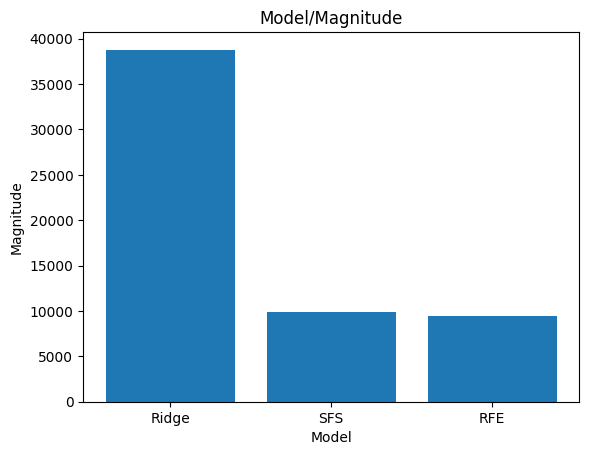

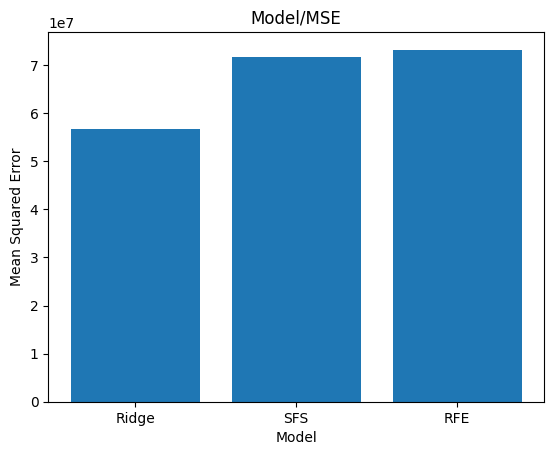

     Model                              Pipeline    Magnitude  coeficients  \
0    Ridge  (StandardScaler(), Ridge(alpha=0.1))  38786.64614  2968.634538   
46   Ridge  (StandardScaler(), Ridge(alpha=0.1))  38786.64614  1424.988676   
146  Ridge  (StandardScaler(), Ridge(alpha=0.1))  38786.64614   958.700289   
122  Ridge  (StandardScaler(), Ridge(alpha=0.1))  38786.64614   878.634051   
134  Ridge  (StandardScaler(), Ridge(alpha=0.1))  38786.64614   829.120512   
..     ...                                   ...          ...          ...   
44   Ridge  (StandardScaler(), Ridge(alpha=0.1))  38786.64614  -763.310032   
141  Ridge  (StandardScaler(), Ridge(alpha=0.1))  38786.64614  -848.113473   
123  Ridge  (StandardScaler(), Ridge(alpha=0.1))  38786.64614 -1000.149123   
142  Ridge  (StandardScaler(), Ridge(alpha=0.1))  38786.64614 -1014.422640   
1    Ridge  (StandardScaler(), Ridge(alpha=0.1))  38786.64614 -1138.558106   

                   features  
0                      year  
46 

In [58]:
from sklearn.feature_selection import SequentialFeatureSelector, RFE
import warnings
warnings.filterwarnings('ignore')

alpha= 0.1

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha))
])

sfs_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=4)),
    ('model', Ridge(alpha))
])

rfe_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', RFE(Lasso(), n_features_to_select=4)),
    ('model', Ridge(alpha))
])

# Fit the pipelines
ridge_pipeline.fit(X_train, y_train)
sfs_pipeline.fit(X_train, y_train)
rfe_pipeline.fit(X_train, y_train)

# Print the coefficients of the Ridge model

# Compare the magnitude of the results
ridge_magnitude = np.sum(np.abs(ridge_pipeline.named_steps['model'].coef_))
sfs_magnitude = np.sum(np.abs(sfs_pipeline.named_steps['model'].coef_))
rfe_magnitude = np.sum(np.abs(rfe_pipeline.named_steps['model'].coef_))

ridge_pipeline
sfs_pipeline
rfe_pipeline

ridge_features = pd.Series(ridge_pipeline.named_steps['model'].coef_, index=X.columns)
ridge_features_sorted = ridge_features.sort_values(ascending=False)


# Create a graph with the magnitudes
plt.bar(['Ridge', 'SFS', 'RFE'], [ridge_magnitude, sfs_magnitude, rfe_magnitude])
plt.xlabel('Model')
plt.ylabel('Magnitude')
plt.title("Model/Magnitude")
plt.show()

# Calculate the mean squared error for each model
ridge_mse = mean_squared_error(y_test, ridge_pipeline.predict(X_test))
sfs_mse = mean_squared_error(y_test, sfs_pipeline.predict(X_test))
rfe_mse = mean_squared_error(y_test, rfe_pipeline.predict(X_test))


# Create a graph with the mean squared errors
plt.bar(['Ridge', 'SFS', 'RFE'], [ridge_mse, sfs_mse, rfe_mse])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title("Model/MSE")
plt.show()

ridge = pd.DataFrame({"Model": "Ridge","Pipeline": ridge_pipeline,"Magnitude":ridge_magnitude,"coeficients":ridge_pipeline.named_steps['model'].coef_, "features": X.columns}) \
.reset_index().drop("index", axis = 1) \
.sort_values("coeficients",ascending=[False])
#print(pd.DataFrame({"Ridge_coefficients": ridge_pipeline.named_steps['model'].coef_}))
print(ridge)
print("Ridge Magnitude:", ridge_magnitude)
print(f'Ridge_features: \n{ridge_features_sorted}')
print("Ridge MSE:", ridge_mse)
print()



selected_features_sfs = X.columns[sfs_pipeline.named_steps['selector'].get_support()]
#print(pd.DataFrame({"SFS Coefficients": sfs_pipeline.named_steps['model'].coef_}))
print("SFS Magnitude:", sfs_magnitude)
#print(f'SFS_features: \n{selected_features_sfs.to_frame().iloc[:,0]}')
sfs = pd.DataFrame({"Model": "sfs","Pipeline": sfs_pipeline,"Magnitude":sfs_magnitude,"coeficients":sfs_pipeline.named_steps['model'].coef_, "features": selected_features_sfs.to_series().T}) \
.reset_index().drop("index", axis = 1) \
.sort_values("coeficients",ascending=[False])
print(sfs)

print("SFS MSE:", sfs_mse)
print()

selected_features_rfe = X.columns[rfe_pipeline.named_steps['selector'].get_support()]

#print(pd.DataFrame({"RFE Coefficients": rfe_pipeline.named_steps['model'].coef_}))
print("RFE Magnitude:", rfe_magnitude)
#print(f'RFE_features: \n{selected_features_rfe.to_frame()}')
rfe = pd.DataFrame({"Model":"RFE","Pipeline":rfe_pipeline,"Magnitude":rfe_magnitude, "coeficients":rfe_pipeline.named_steps['model'].coef_, "features": selected_features_rfe.to_series().T}) \
.reset_index().drop("index", axis = 1) \
.sort_values("coeficients",ascending=[False])
print(rfe)

print("RFE MSE:", rfe_mse)
print()


In [37]:
ridge_coef ={"Ridge_coefficients": ridge_pipeline.named_steps['model'].coef_}
pd.DataFrame({"Ridge_coefficients": ridge_pipeline.named_steps['model'].coef_})


,Ridge_coefficients
0,2968.634538
1,-1138.558106
2,92.605949
3,225.277860
4,97.870625
...,...
142,-1014.422640
143,497.296397
144,268.751566
145,-145.032434


In [38]:
d = pd.Series(sfs_pipeline.named_steps['model'].coef_, index=selected_features_sfs.to_series().T)
d


year                  3342.583417
transmission_other    1841.816000
drive_fwd            -3113.384190
drive_unknown        -1621.502948
dtype: float64

In [47]:
ridge_features_sorted.to_frame()

,0
year,2968.634538
transmission_other,1424.988676
condition_unknown,958.700289
drive_4wd,878.634051
type_pickup,829.120512
...,...
transmission_automatic,-763.310032
condition_fair,-848.113473
drive_fwd,-1000.149123
condition_good,-1014.422640


In [48]:
sfs

,Model,Pipeline,Magnitude,coeficients,features
0,sfs,"(StandardScaler(), SequentialFeatureSelector(e...",9919.286554,3342.583417,year
1,sfs,"(StandardScaler(), SequentialFeatureSelector(e...",9919.286554,1841.816000,transmission_other
3,sfs,"(StandardScaler(), SequentialFeatureSelector(e...",9919.286554,-1621.502948,drive_unknown
2,sfs,"(StandardScaler(), SequentialFeatureSelector(e...",9919.286554,-3113.384190,drive_fwd


In [49]:
rfe

,Model,Pipeline,Magnitude,coeficients,features
0,RFE,"(StandardScaler(), RFE(estimator=Lasso(), n_fe...",9417.920968,3213.132403,year
2,RFE,"(StandardScaler(), RFE(estimator=Lasso(), n_fe...",9417.920968,2417.552959,drive_4wd
3,RFE,"(StandardScaler(), RFE(estimator=Lasso(), n_fe...",9417.920968,1909.316961,drive_rwd
1,RFE,"(StandardScaler(), RFE(estimator=Lasso(), n_fe...",9417.920968,1877.918644,transmission_other


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.